# 项目：客户流失深度分析与可执行挽留策略洞察
## 一、项目概览
## 1.项目背景与业务痛点

   在当今竞争激烈的市场环境中，获取一个新的客户成本远高于保留一个老客户。客户流失是许多以订阅制或长期服务为核心业务的公司（如电信、SaaS、流媒体等）面临的主要挑战。
- 收入损失：每一位流失的客户都直接导致经常性收入的减少。
  
- 反应滞后：管理层看到的月度流失报告往往是”事后诸葛“，无法在客户做出决定前进行有效干预。
 
- 策略模糊：业务团队缺乏清晰的数据指引，不知道”应该重点关注哪些客户“以后”采取什么措施最有效“。
  
本项目旨在利用纯粹的数据分析技术，深入挖掘流失根源，将静态数据转化为动态，可操作的业务洞察，帮助企业从被动报告转向主动管理。
  
## 2.项目目标与核心价值

   本项目的核心目标是构建一个完整的”现状诊断——根本分析——策略制定——效果追踪“业务分析闭环，而不依赖于复杂的机器学习模型。
   
   我们将通过回答一系列关键的商业问题来实现这一目标：
   
- 现状如何？

   -整体流失率是多少？
 
   -流失的客户为我们带来了多少损失？
 
- 是谁在流失？

   -流失客户具有什么样的人口统计学特征和账户特征？（用户画像）
 
   -是否存在明显的高流失风险的客户群？
 
- 为什么会流失？

   -流失客户与非流失客户在行为上有何关键差异？（根本原因分析）
 
   -哪些产品、服务、账单因素与流失最相关？
 
- 我们该怎么做？

   -如何对客户进行分群，以便执行精准的、个性化的挽留策略？
 
   -如何通过Power BI仪表板让业务团队能够持续监控并快速行动？
 
**最终交付物**将是一个包含**Python分析逻辑**和**交互式Power BI管理驾驶舱**的完整解决方案，让业务员一眼看清问题，并知道从哪力入手。

## 3.分析方法论与业务闭环设计

本项目将遵循以下清晰的、可执行的闭环分析框架：

   - 1.数据整合与清洗（Python):
     - 使用Pandas进行数据加载、清洗和处理缺失值
     - 进行必要的特征工程
   - 2.现状诊断与描述性分析（Python+Power BI):
     - 计算关键指标：
     - 通过可视化（Matplotlib/Seaborn in Python,Charts in Power BI)展示整体趋势和分布。
   - 3.根因分析与用户画像（Python +Power BI）：
     - **对比分析**：系统地比较流失客户与留存客户在各类指标上的差异
     - **相关性分析**：识别与流失率最高相关的因素。
     - **群组分析/用户画像**：通过多维交叉分析，构建典型的“高流失风险客户画像”。
   - 4.策略制定与行动指引（Power BI 为核心）：
     - 将分析结论转化为**可筛选、可下钻的Power BI仪表板**。
     - 行动界面：业务人员可筛选出
     - 策略建议：在仪表中直接附上针对不同画像群体的推荐策略。
   - 5.闭环与迭代（业务流程）：
     - 建立机制，将挽留行动的效果反馈回数据系统
     - 定期更新分布，评估策略有校性，并调整客户画像和行动优先级
## 4.技术栈与数据
   - 分析工具：Python（Pandas，Numpy，Matplotlib，Seaborn）用于深度数据探索和清洗。
   - 可视化与交付平台：Microsoft Power BI，用于构建交互式业务仪表盘，实现分析结果的**产品化**。
   - 数据源：本项目使用Kaggle的“Customer Churn Prediction”数据集，该数据集包含了虚拟电信公司的客户信息，非常适合模拟真实的业务场景

 



## 二、分析过程

分析目标：从业务角度形成闭环，即通过数据分析找出流失客户的特征，提出挽留策略，并通过Power BI仪表板进行监控。




### 1.数据理解与业务映射



In [1]:
#首先将技术字段转化未业务语言：
import pandas as pd

business_language={"技术字段":["state","accout_length","international_plan","voice_vmail_messages","白天/晚间/夜晚/国际通话的时长、次数、费用",
                          "客户服务通话次数","流失率"],
                   "业务含义":["客户所在州","在网时长","国际套餐","语音邮件数量","客户使用行为模式","客服联系频率","是否流失"],
                   "分析价值":["区域分析","客户忠诚度指标","产品偏好","服务使用习惯","消费习惯分析","客户满意度指标","核心目标变量"]}
df=pd.DataFrame(business_language)
df

,技术字段,业务含义,分析价值
0,state,客户所在州,区域分析
1,accout_length,在网时长,客户忠诚度指标
2,international_plan,国际套餐,产品偏好
3,voice_vmail_messages,语音邮件数量,服务使用习惯
4,白天/晚间/夜晚/国际通话的时长、次数、费用,客户使用行为模式,消费习惯分析
5,客户服务通话次数,客服联系频率,客户满意度指标
6,流失率,是否流失,核心目标变量


### 2.Python 深度分析方案

#### 2.1 数据预处理与基础分析

In [2]:
#2.1.1导入必要的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

plt.rcParams["font.sans-serif"]=["SimHei"]
plt.rcParams["axes.unicode_minus"]=False
sns.set_style("whitegrid")


#2.1.2 加载数据
data=pd.read_csv(r"D:\数据分析学习\kaggle数据\customer-churn-prediction\train.csv")

print("数据基本信息：")
print(f"数据形状：{data.shape}")
print("\n前5行数据：")
data.head()




数据基本信息：
数据形状：(4250, 20)

前5行数据：


,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [3]:
#2.1.3 查看数据结构和类型
print("数据列信息：")
print(data.info())
print("\n数据类型分布：")
print(data.dtypes.value_counts())


数据列信息：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-n

In [4]:
#2.1.4 检查数据质量
print("缺失值情况：")
missing_data=data.isnull().sum()
print(missing_data[missing_data>0])
print("\n重复值数量：")
print(f"重复行：{data.duplicated().sum()}")

缺失值情况：
Series([], dtype: int64)

重复值数量：
重复行：0


## 业务总结
**分析目标**:验证数据质量，了解客户基础情况

**关键发现**:
- 数据包含4250条记录,22个特征
- 数据质量良好，无缺失值
  
**业务意义**：
- 所有特征完整可用，适合进行深入分析
  

In [5]:
#2.1.5数值型变量描述
print("数值型变量描述：")
numeric_cols=data.select_dtypes(include=[np.number]).columns
print(data[numeric_cols].describe())



数值型变量描述：
       account_length  number_vmail_messages  total_day_minutes  \
count     4250.000000            4250.000000        4250.000000   
mean       100.236235               7.631765         180.259600   
std         39.698401              13.439882          54.012373   
min          1.000000               0.000000           0.000000   
25%         73.000000               0.000000         143.325000   
50%        100.000000               0.000000         180.450000   
75%        127.000000              16.000000         216.200000   
max        243.000000              52.000000         351.500000   

       total_day_calls  total_day_charge  total_eve_minutes  total_eve_calls  \
count      4250.000000       4250.000000        4250.000000      4250.000000   
mean         99.907294         30.644682         200.173906       100.176471   
std          19.850817          9.182096          50.249518        19.908591   
min           0.000000          0.000000           0.000000        

In [6]:
#2.1.6 分类变量描述
categorical_cols=data.select_dtypes(include=["object"]).columns
print("分类变量分布：")
for col in categorical_cols:
   print(f"\n{col}的分布：")
   print(data[col].value_counts().head())

分类变量分布：

state的分布：
state
WV    139
MN    108
ID    106
AL    101
VA    100
Name: count, dtype: int64

area_code的分布：
area_code
area_code_415    2108
area_code_408    1086
area_code_510    1056
Name: count, dtype: int64

international_plan的分布：
international_plan
no     3854
yes     396
Name: count, dtype: int64

voice_mail_plan的分布：
voice_mail_plan
no     3138
yes    1112
Name: count, dtype: int64

churn的分布：
churn
no     3652
yes     598
Name: count, dtype: int64



目标变量分布：
churn
no     3652
yes     598
Name: count, dtype: int64

整体流失率：14.07%


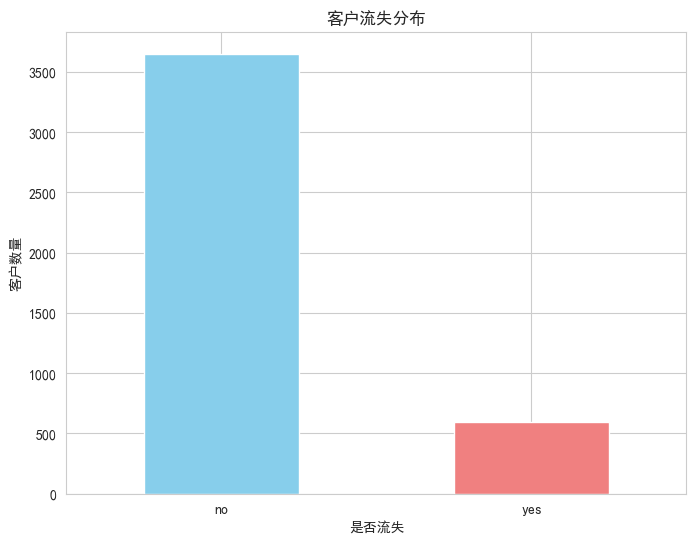

In [7]:
# 2.1.7 目标变量分析
print("\n目标变量分布：")
print(data["churn"].value_counts())
#将字符串churn转换为数值型
data["churn_encoded"]=data["churn"].map({"yes":1,"no":0}) 
print(f"\n整体流失率：{data["churn_encoded"].mean():.2%}")


plt.figure(figsize=(8,6))
plt.rcParams["font.sans-serif"]=["SimHei"]
data["churn"].value_counts().plot(kind="bar",color=["skyblue","lightcoral"])
plt.title("客户流失分布")
plt.xlabel("是否流失")
plt.ylabel("客户数量")
plt.xticks(rotation=0)



plt.show()      



## 业务总结
**分析目标**:理解客户群体特征和行为模式

**关键发现**:
- 客户平均账户周期100个月，客户联系频率较低（平均1.6次）
- 日间费用平均为31，晚间为17，夜晚为9.国际为2.8
- 整体流失率为14.07
  
**业务意义**：
- 明确了客户基础画像，为精准分群和针对性策略制定提供依据

国际套餐用户的流失情况：
international_plan
no     0.111832
yes    0.421717
Name: churn_encoded, dtype: float64

语音邮件数量的流失情况：
voice_mail_plan
no     0.164436
yes    0.073741
Name: churn_encoded, dtype: float64


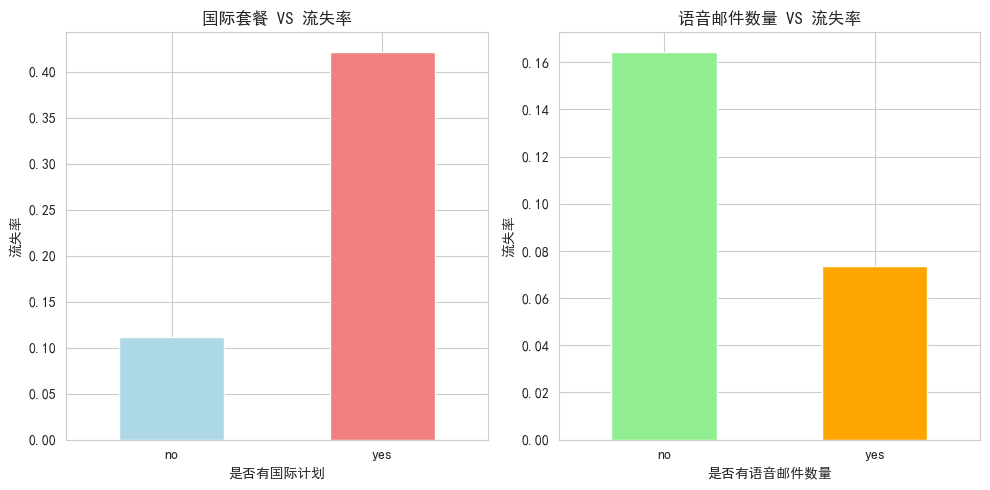

In [8]:
#2.1.8分析国际套餐与流失的关系
print("国际套餐用户的流失情况：")
intl_churn=data.groupby("international_plan")["churn_encoded"].mean()
print(intl_churn)


print("\n语音邮件数量的流失情况：")
voice_mail_churn=data.groupby("voice_mail_plan")["churn_encoded"].mean()
print(voice_mail_churn)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
data.groupby("international_plan")["churn_encoded"].mean().plot(kind="bar",color=["lightblue","lightcoral"])
plt.title("国际套餐 VS 流失率")
plt.xlabel("是否有国际计划")
plt.ylabel("流失率")
plt.xticks(rotation=0)

plt.subplot(1,2,2)
data.groupby("voice_mail_plan")["churn_encoded"].mean().plot(kind="bar",color=["lightgreen","orange"])
plt.title("语音邮件数量 VS 流失率")
plt.xlabel("是否有语音邮件数量")
plt.ylabel("流失率")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


## 业务总结
**分析目标**:分析国际套餐,语音邮件数量与流失的关系

**关键发现**:
- 有国际套餐流失率占42%。
  
**业务意义**：
- 发现核心风险信号，为预警机制建设提供数据支撑


客服电话次数与流失率：
number_customer_service_calls
0    0.109481
1    0.108924
2    0.107709
3    0.112903
4    0.440191
5    0.604938
6    0.678571
7    0.538462
8    0.500000
9    1.000000
Name: churn_encoded, dtype: float64


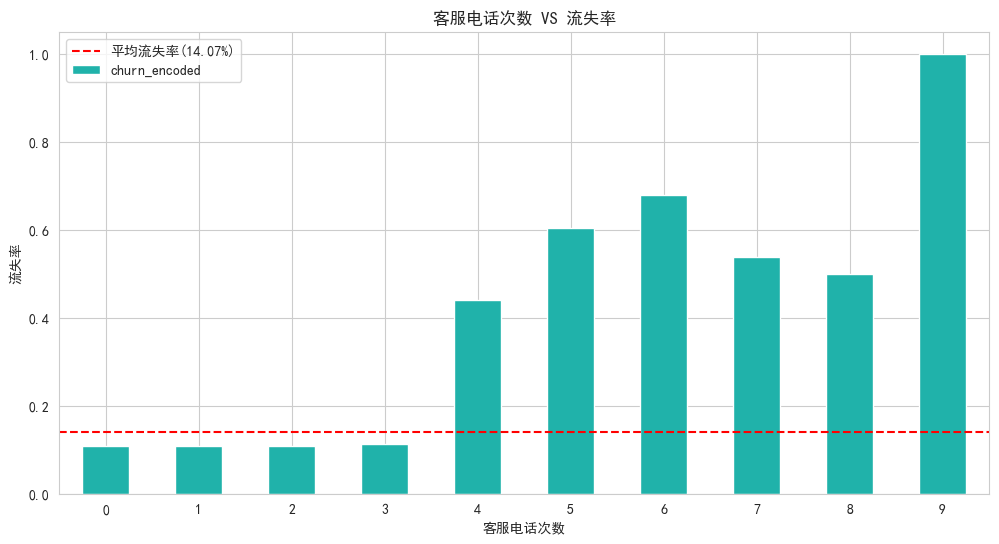

In [9]:
# 2.1.9分析客服电话次数与流失的关系
print("\n客服电话次数与流失率：")
service_churn=data.groupby("number_customer_service_calls")["churn_encoded"].mean()
print(service_churn)

plt.figure(figsize=(12,6))
service_churn.plot(kind="bar",color="lightseagreen")
plt.axhline(y=data["churn_encoded"].mean(),color="red",linestyle="--",label=f"平均流失率({data["churn_encoded"].mean():.2%})")
plt.title("客服电话次数 VS 流失率")
plt.xlabel("客服电话次数")
plt.ylabel("流失率")
plt.legend()
plt.xticks(rotation=0)
plt.show()


账户月数分组流失率：
account_length_group
0-3月      0.125000
4-6月      0.000000
7-12月     0.055556
1-2年      0.135135
2-3年      0.118644
3-5年      0.118162
5-10年     0.148376
10-15年    0.139219
15年以上     0.142857
Name: churn_encoded, dtype: float64


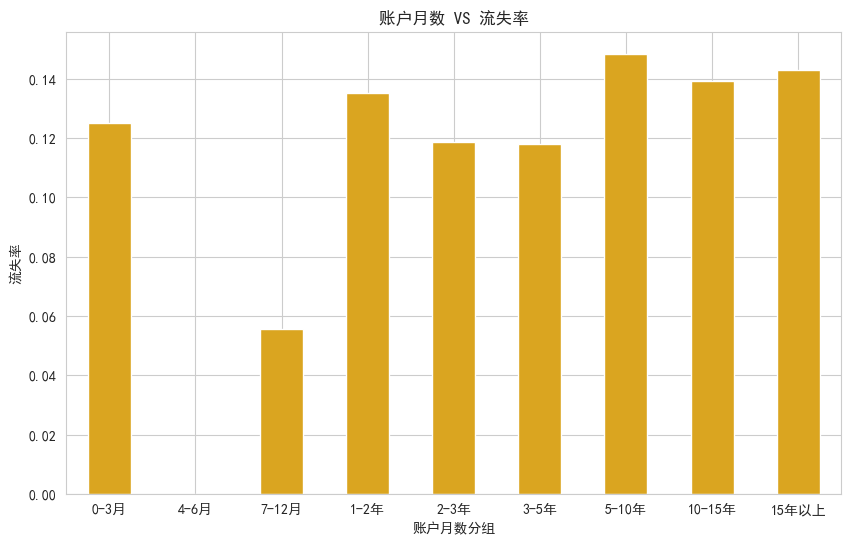

In [10]:
# 2.1.10 分析账户月数与流失的关系
#将账户月数分组查看
plt.rcParams["font.sans-serif"]=["SimHei"]
bins=[0,3,6,12,24,36,60,120,180,250]
labels=["0-3月","4-6月","7-12月","1-2年","2-3年","3-5年","5-10年","10-15年","15年以上"]
data["account_length_group"]=pd.cut(data["account_length"],bins=bins,labels=labels)
print("账户月数分组流失率：")
data["churn_encoded"]=data["churn"].map({"yes":1,"no":0}) 
length_churn=data.groupby("account_length_group")["churn_encoded"].mean()
print(length_churn)


plt.figure(figsize=(10,6))
length_churn.plot(kind="bar",color="goldenrod")
plt.title("账户月数 VS 流失率")
plt.xlabel("账户月数分组")
plt.ylabel("流失率")
plt.xticks(rotation=0)
plt.show()





## 业务总结
**分析目标**:识别与客户流失强相关的关键因素

**关键发现**:
- 国际套餐用户流失风险极高（42% VS 12% ），风险倍数3.6倍
- 客户联系 ＞ 3次客户流失率突破40%，呈现明显阈值效应
- 新客户（＜3个月）和 老客户（＞12个月）呈现高流失率
  
**业务意义**：
- 发现三大核心风险信号，为预警机制建设提供数据支撑

#### 2.2：多变量分析-深入探索
#### 分析过程


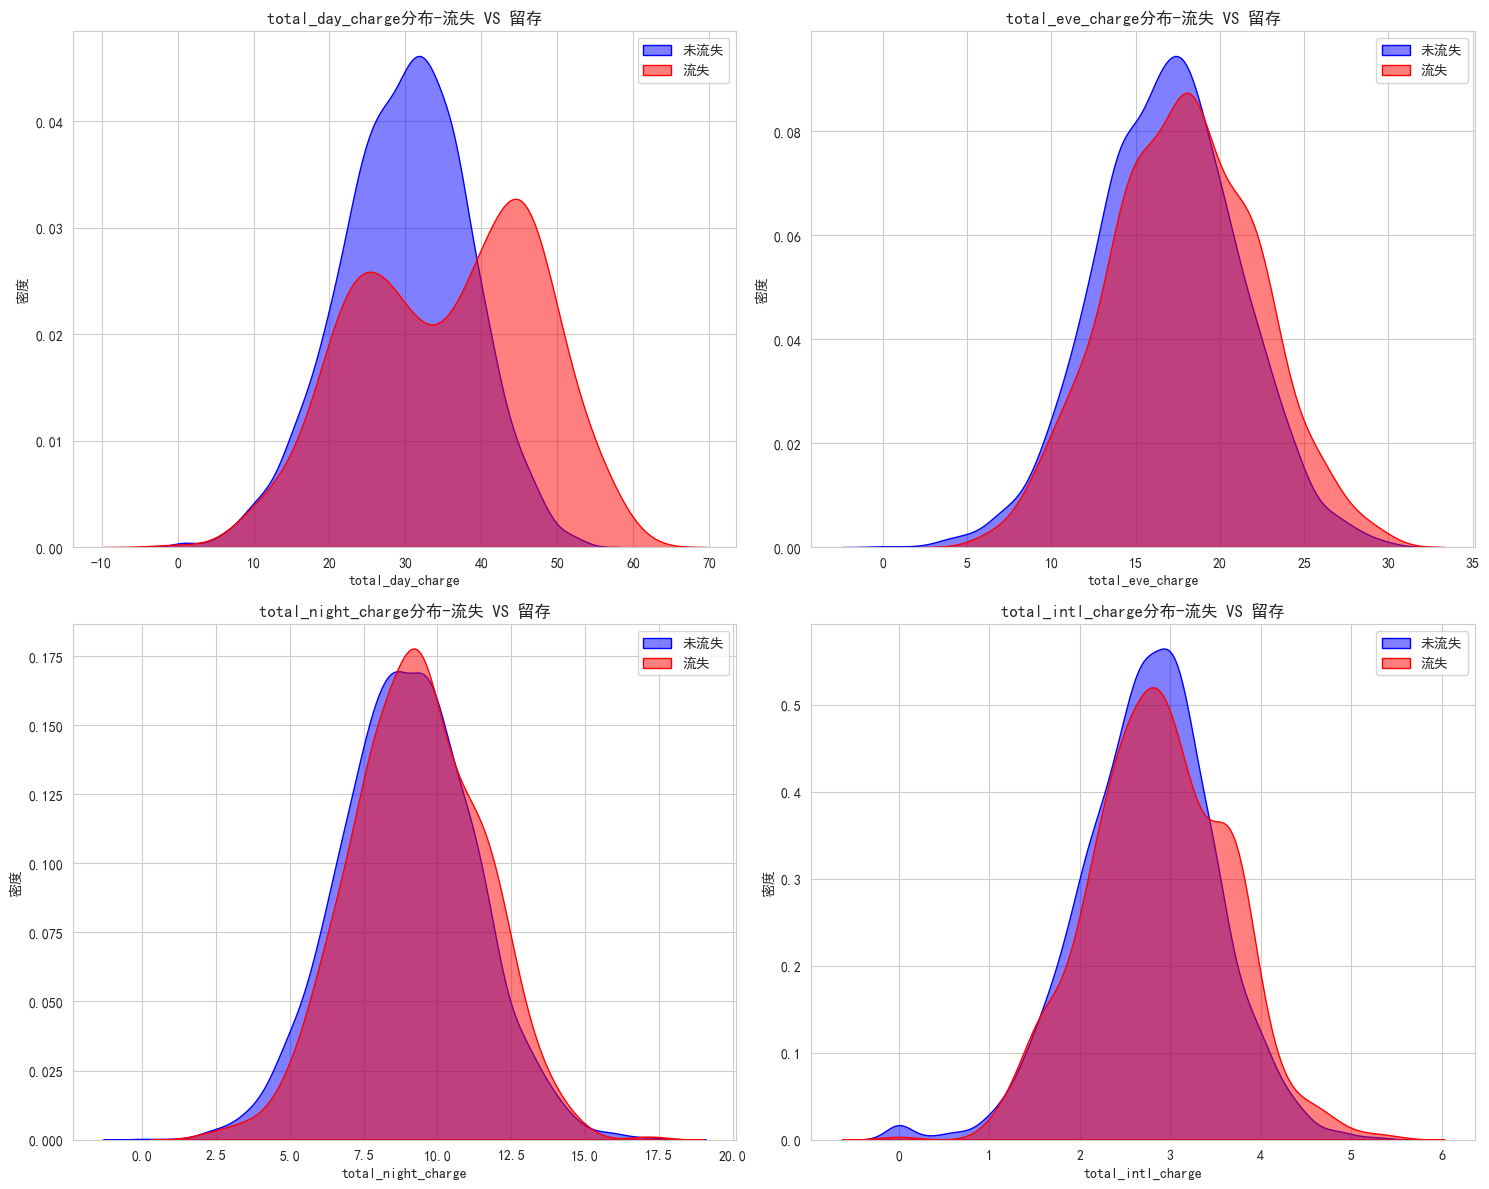

日间费用>40元客户数：651
该群体流失率：38.9%
对比群体整体流失率：14.1%


In [11]:
#2.2.1 分析费用相关特征

plt.rcParams["font.sans-serif"]=["SimHei"]
fee_columns=["total_day_charge","total_eve_charge","total_night_charge","total_intl_charge"]
plt.figure(figsize=(15,12))
for i,col in enumerate(fee_columns,1):
    plt.subplot(2,2,i)
    not_churn_data=data.loc[data["churn"]=="no",col]
    churn_data=data.loc[data["churn"]=="yes",col]
   
    sns.kdeplot(not_churn_data,alpha=0.5,label="未流失",fill=True,color="blue")
    sns.kdeplot(churn_data,alpha=0.5,label="流失",fill=True,color="red")
    plt.title(f"{col}分布-流失 VS 留存")
    plt.xlabel(col)
    plt.ylabel("密度")
    plt.legend()
plt.tight_layout()
plt.show()     

#量化分析日间费用超过40元的客户
high_day_charge=data[data["total_day_charge"]>40]
print(f"日间费用>40元客户数：{len(high_day_charge)}")
print(f"该群体流失率：{high_day_charge["churn_encoded"].mean():.1%}")
print(f"对比群体整体流失率：{data["churn_encoded"].mean():.1%}")

## 业务总结
**分析目标**:通过密度分析探索客户费用行为模式与流失的深层关系

**关键发现**:
- 费用敏感区间识别：日间费用超过40元时，流失客户密度显著高于留存客户
- 风险阈值确认：40元成为明显的风险分界点，超过此费用客户流失概率大幅增加
- 费用结构差异：日间费用对流失影响最大，晚间和夜间费用分布差异相对较小
  
**业务意义**：
- 精准定价策略：为高费用客户设计专属套餐，降低费用敏感度
- 风险预警优化：将日间费用40元纳入预警指标体系
- 客户关怀重点：对高费用客户主动提供费用分析和优化建议
- 产品设计指导：针对高使用量客户开发增值服务，提供粘性
  

In [12]:
#探索高价值客户的流失情况

high_value_threshold=data["total_day_charge"].quantile(0.8)
data["is_high_value"]=data["total_day_charge"] > high_value_threshold
print("高价值客户（日间通话）的流失情况：")
high_value_churn=data.groupby("is_high_value")["churn_encoded"].mean()
print(high_value_churn)
print(f"\n高价值（日间通话）客户定义阈值：{high_value_threshold:.2f}")


高价值客户（日间通话）的流失情况：
is_high_value
False    0.092299
True     0.334906
Name: churn_encoded, dtype: float64

高价值（日间通话）客户定义阈值：38.28


### 业务总结
**分析目标**:探索高价值客户的流失情况

**关键发现**：为公司贡献80%总收入的日间消费高价值客户群体，其流失率占38.9%

**业务洞察**：这不仅是客户流失，更是战略危机。


### 2.3：相关性分析

  

与流失率最相关的特征：
churn_encoded                    1.000000
churn                            1.000000
number_customer_service_calls    0.221220
total_day_minutes                0.215272
total_day_charge                 0.215263
total_eve_minutes                0.078855
total_eve_charge                 0.078852
total_intl_minutes               0.055186
total_intl_charge                0.055177
total_night_minutes              0.046647
Name: churn, dtype: float64


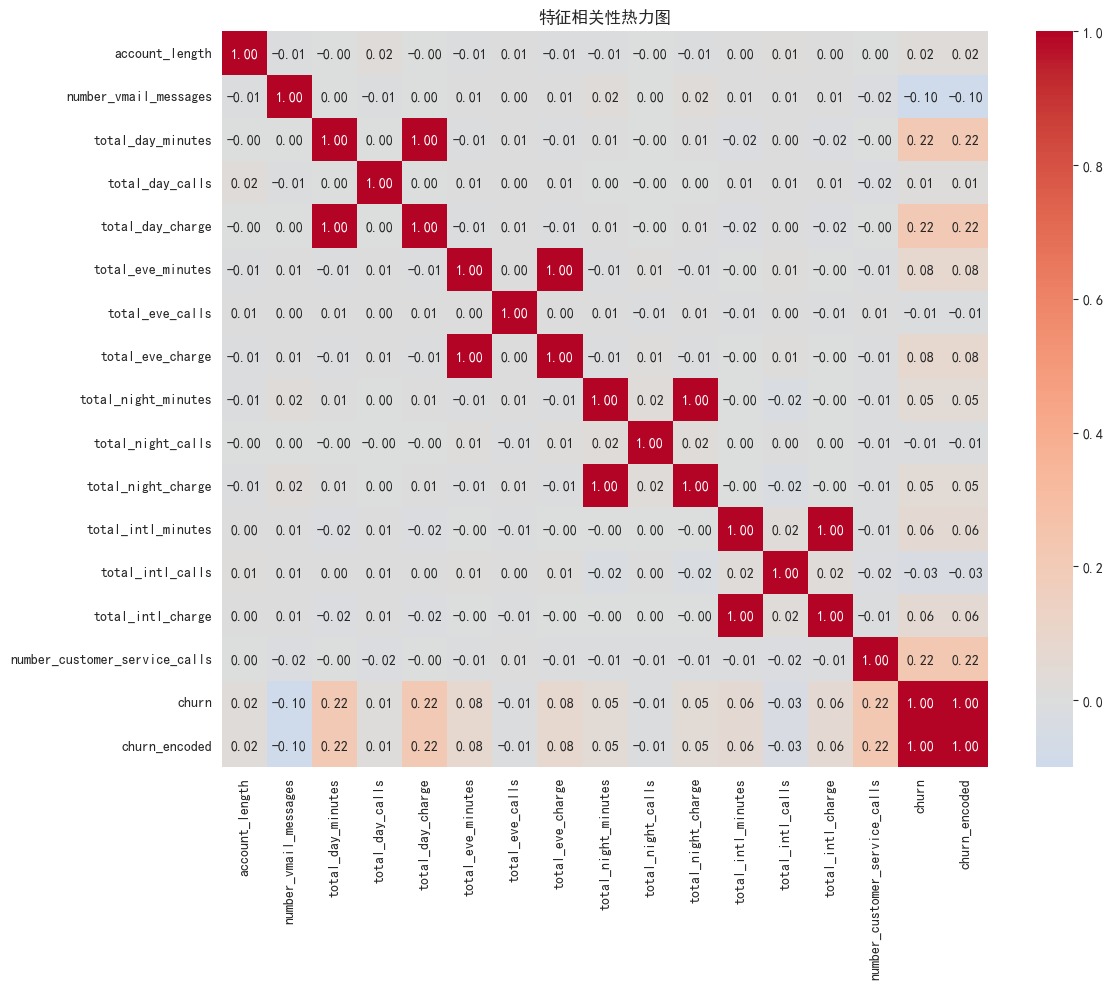

In [13]:
#2.3.1 计算数值变量间的相关性
data["churn"]=data["churn"].map({"yes":1,"no":0})
numeric_data=data.select_dtypes(include=[np.number])
correlation_matrix=numeric_data.corr()
print("与流失率最相关的特征：")
churn_corr=correlation_matrix["churn"].sort_values(ascending=False)
print(churn_corr.head(10))

plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix,annot=True,cmap="coolwarm",center=0,fmt=".2f")
plt.title("特征相关性热力图")
plt.tight_layout()
plt.show()



## 业务总结
**分析目标**:通过相关性分析与流失的深层关系

**关键发现**:
- “日间分钟数，日间费用，客服服务次数 ”对客户流失的影响程度最大。

  
**业务洞察**：
- “日间通话体验”是客户留存的关键战场
- “费用敏感度”超出预期
- 客服联系是“最后求救信号”

### 2.4：交叉分析和洞察发现
  

国际套餐与客服电话的交叉分析：
churn_encoded                                            0         1
international_plan number_customer_service_calls                    
no                 0                              0.919090  0.080910
                   1                              0.920578  0.079422
                   2                              0.919633  0.080367
                   3                              0.915020  0.084980
                   4                              0.588235  0.411765
                   5                              0.424658  0.575342
                   6                              0.346154  0.653846
                   7                              0.500000  0.500000
                   8                              0.500000  0.500000
                   9                              0.000000  1.000000
yes                0                              0.652632  0.347368
                   1                              0.597122  0.402878
                  

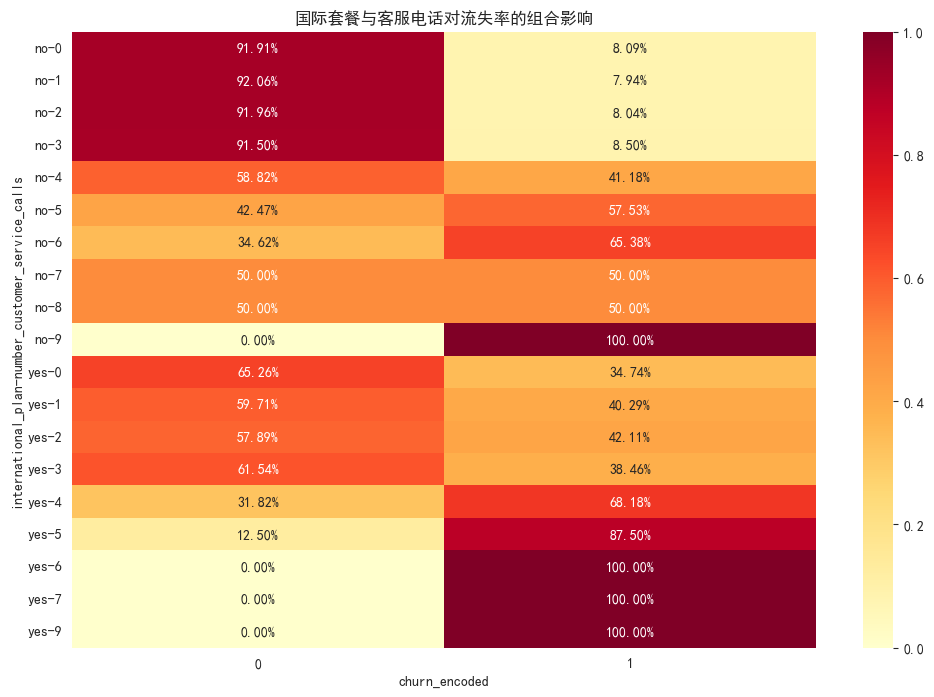

In [14]:
#2.4.1 国际套餐+客户电话的交叉分析
print("国际套餐与客服电话的交叉分析：")
cross_table=pd.crosstab([data["international_plan"],data["number_customer_service_calls"]],data["churn_encoded"],normalize="index")
print(cross_table)

plt.figure(figsize=(12,8))
sns.heatmap(cross_table,annot=True,cmap="YlOrRd",fmt=".2%")
plt.title("国际套餐与客服电话对流失率的组合影响")
plt.show()

## 业务总结
**分析目标**:通过国际套餐+客户电话的交叉分析与流失的深层关系

**关键发现**:
- 没有国际套餐的客户群，客服通话次达到4次时候，流失率占41.18%，而有国际套餐的客户群，客服通话次数 0次，流失率 占34.74%，达到1次，流失率占40.29%

  
**业务意义**：
- 国际套餐产品存在缺陷
- 重视对有国际套餐客服群体的客服服务质量

## 三、项目总结
### 1.关键发现总结
- 1.总体流失率占14.07%；
- 2.有国际套餐流失率占 42%；
- 3.高价值客户（为公司贡献80%收入）流失率占 33.5%，且阈值为38.28；
- 4.日间费用超过40元的客户群体，其流失率占38.9%；
- 5.没有国际套餐的用户群体，客服通话次数达到4次时候，流失率占41.18%，而有国际套餐的客户群，客服通话次数 0次，流失率占34.74%，达到1次，流失率占40.29%。

### 2.业务洞察

-**产品危机**：国际套餐是本项目发现的“流失之王”，其客户流失率达42%，是平均水平的3倍；

-**收入危机**：贡献80%收入的高价值客户流失严重（流失率33.5%），公司利润根基正在被动摇；

-**服务危机**：客服体验是最后防线，但已失守。客户问题无法被快速解决（通话次数≥3次流失率飙升），
              导致客户失望离去。

### 3.关键行动建议
- 立即止血（30天内）：

 -- 成立“核心客户保卫组”，优先对“高价值+国际套餐”客户进行一对一挽留。
  
 -- 建立“客服3次来电”红色预警机制，问题自动升级，由专家团队介入解。
 
- 根治问题（90天内）：
 
 -- 重构国际套餐产品，解决其性价比和体验的根本缺陷。
  
 -- 改革客服体系，以“一次性解决”为核心考核指标，减少客户重复来电。

### 4.监控仪表板
根据上面核心指标所建立的预警机制由Power BI 监控。


In [15]:
#为方便制作仪表板，创建以下特征工程

#1.计算总费用
data["total_charge"]=(data["total_day_charge"]+data["total_eve_charge"]+data["total_night_charge"]
                      +data["total_intl_charge"])
#2.基于总费用进行客户分层
total_high_value=data["total_charge"].quantile(0.8)
total_medium_value=data["total_charge"].quantile(0.5)
data["is_total_high_value"]=data["total_charge"]>=total_high_value
data["customer_tier"]=pd.cut(data["total_charge"],bins=[0,total_medium_value,total_high_value,float("inf")],
                             labels=["低价值","中价值","高价值"])
#3.客户分群（基于行为习惯）
conditions=[(data["number_customer_service_calls"]>=3)&(data["international_plan"]=="yes"),
             (data["number_customer_service_calls"]>=3),
             (data["total_day_charge"] > 40),
              (data["international_plan"]=="yes"),
             (data["account_length"]>data["account_length"].quantile(0.8))]
choices=["双重高风险客户","高投诉风险","日间高消费","国际套餐用户","忠实老用户"]
data["customer_segment"]=np.select(conditions,choices,default="普通客户")
#4.风险标志字段
data["day_charge_over_40"]=data["total_day_charge"]>40
data["service_call_risk"]=pd.cut(data["number_customer_service_calls"],bins=[-1,1,3,100],
                                      labels=["低风险","中风险","高风险"])

#5.查看最终表结构
print("最终数据表包含列：",data.columns.tolist())
print("\n数据维度：",data.shape)


#6.导出单张宽度表到csv
data.to_csv(r"D:\数据分析学习\kaggle数据\customer-churn-prediction\客户流失分析——特征宽表.csv",index=False,encoding="utf-8-sig")
print("特征宽表导出完成！")




最终数据表包含列： ['state', 'account_length', 'area_code', 'international_plan', 'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls', 'churn', 'churn_encoded', 'account_length_group', 'is_high_value', 'total_charge', 'is_total_high_value', 'customer_tier', 'customer_segment', 'day_charge_over_40', 'service_call_risk']

数据维度： (4250, 29)
特征宽表导出完成！
